In [1]:
import pandas as pd
from orion.data import load_signal, load_anomalies
from lintel.utils import *

In [2]:
df = pd.DataFrame(columns = ['signal', 'sequence', 'ano_indices'])

In [3]:
df

,signal,sequence,ano_indices


In [4]:
train_data = load_signal('E-1')

In [5]:
train_label = load_anomalies('E-1')

In [6]:
train_label

,start,end
0,1393027200,1393675200
1,1406203200,1416484800


In [7]:
print(train_data[(train_data.timestamp >= train_label.start[0]) & (train_data.timestamp <= train_label.end[0])].index.to_list())

[7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7893, 7894, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7909, 7910]


In [8]:
e7 = create_str_seq(train_data, 7900, 8700)

In [9]:
e7_ano_ind = create_str_ind(8163-7900, 8443-7900)

In [10]:
e1 = create_str_seq(train_data, 7600, 8200)

In [11]:
e1_ano_ind = create_str_ind(7880-7600, 7910-7600)

In [ ]:
m = get_message_with_example(e1, e7, e7_ano_ind)

In [ ]:
m

In [ ]:
ans = get_model_response(m)

In [ ]:
e1_ano_ind

In [ ]:
l = create_list_ind(ans)

In [ ]:
l

In [ ]:
# loop 100 times 

for i in 

In [ ]:
m0 = get_message_zero_shot(e1)

In [ ]:
ans_0 = get_model_response(m0)

In [ ]:
ans_0

In [ ]:
create_list_ind(ans_0)

In [45]:
def avg_predicted_prob(message_fn, seq_query, seq_ex, ano_ind_ex, system_prompt_file='system_prompt.txt', max_iter = 5):
    m = message_fn(seq_query, seq_ex, ano_ind_ex, system_prompt_file='system_prompt.txt')
    seq = create_list_ind(seq_query)
    predicted = [0 for i in range(len(seq))]
    for _ in range(max_iter):
        ans = get_model_response(m)
        try:
            ans_list = create_list_ind(ans)
        except: 
            continue
        for i in ans_list: 
            try:
                predicted[i] += 1/max_iter
            except: 
                pass
    return predicted
    

In [46]:
pred = avg_predicted_prob(get_message_zero_shot, e1, e7, e7_ano_ind)

In [51]:
pred_one_shot = avg_predicted_prob(get_message_with_example, e1, e7, e7_ano_ind)

In [47]:
e1_ano_ind = list(range(7880-7600, 7910-7600+1))

In [48]:
true_label = [0 for i in range(8200-7600+1)]
for i in range(8200-7600+1): 
    if i in e1_ano_ind:
        true_label[i] = 1

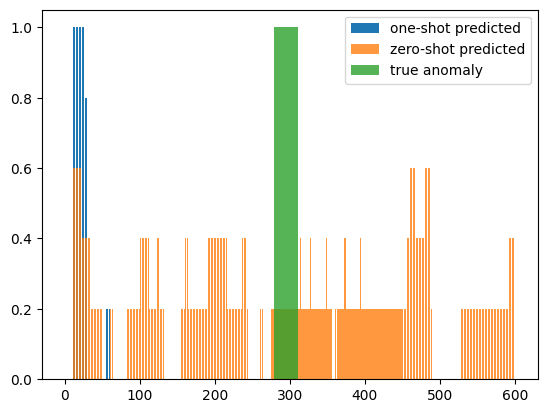

In [53]:
import matplotlib.pyplot as plt
plt.bar(list(range(8200-7600+1)), pred_one_shot, label = 'one-shot predicted')
plt.bar(list(range(8200-7600+1)), pred, label = 'zero-shot predicted', alpha = 0.8)
plt.bar(list(range(8200-7600+1)), true_label, label = 'true anomaly', alpha = 0.8)
plt.legend()

In [40]:
e1

'2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 2 0 0 , 0 , 0 , 0 ,